## Preliminaries

#### Datetime

In [412]:
from datetime import datetime as dt 
now = dt.now()
print("Analysis on", now.strftime('%Y-%m-%d'), "at", now.strftime('%H:%M %p'))

Analysis on 2023-08-14 at 23:44 PM


#### Establish CWD

Identifying the current working directory from which the data is stored:

In [413]:
import os 
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

#### Import libraries

Import the following core libraries to support the analysis:

In [414]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## About the Data

#### About Dataset

This dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic success. The problem is formulated as a three-category classification task, in which there is a strong imbalance towards one of the classes.

#### Data Dictionary

| Column name                  | Description                                                                                          | Definition |
|-----------------------------|-------------------------------------------------------------------------------------------------------|------------|
| Marital status              | The marital status of the student. (Categorical) | 1-single <br>2-married <br>3-widower <br>4-divorced <br>5-defacto union <br>6-legally separated                                                      |
| Application mode            | The method of application used by the student. (Categorical)                                          |1 - 1st phase - general contingent <br>2 - Ordinance No. 612/93 <br>5 - 1st phase - special contingent (Azores Island) <br>7 - Holders of other higher courses <br>10 - Ordinance No. 854-B/99 15 - International student (bachelor) <br>16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent <br>18 - 3rd phase - general contingent <br>26 - Ordinance No. 533-A/99, item b2) (Different Plan) <br>27 - Ordinance No. 533-A/99, item b3 (Other Institution) <br>39 - Over 23 years old <br>42 - Transfer <br>43 - Change of course <br>44 - Technological specialization diploma holders <br>51 - Change of institution/course <br>53 - Short cycle diploma holders <br>57 - Change of institution/course (International) |
| Application order           | The order in which the student applied. (Numerical)                                                   | Application order (between 0 - first choice; and 9 last choice) |
| Course                      | The course taken by the student. (Categorical)                                                        | 33 - Biofuel Production Technologies <br>171 - Animation and Multimedia Design <br>8014 - Social Service (evening attendance) <br>9003 - Agronomy <br>9070 - Communication Design <br>9085 - Veterinary Nursing <br>9119 - Informatics Engineering <br>9130 - Equinculture <br>9147 - Management <br>9238 - Social Service <br>9254 - Tourism <br>9500 - Nursing <br>9556 - Oral Hygiene <br>9670 - Advertising and Marketing Management <br>9773 - Journalism and Communication <br>9853 - Basic Education <br>9991 - Management (evening attendance) |
| Daytime/evening attendance  | Whether the student attends classes during the day or in the evening. (Categorical)                   | 1 – daytime <br>0 - evening |
| Previous qualification      | The qualification obtained by the student before enrolling in higher education. (Categorical)         | 1 - Secondary education <br>2 - Higher education - bachelor's degree <br>3 - Higher education - degree <br>4 - Higher education - master's <br>5 - Higher education - doctorate <br>6 - Frequency of higher education <br>9 - 12th year of schooling - not completed <br>10 - 11th year of schooling - not completed <br>12 - Other - 11th year of schooling <br>14 - 10th year of schooling <br>15 - 10th year of schooling - not completed <br>19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. <br>38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. <br>39 - Technological specialization course <br>40 - Higher education - degree (1st cycle) <br>42 - Professional higher technical course <br>43 - Higher education - master (2nd cycle) |
| Nationality                 | The nationality of the student. (Categorical)                                                         | 1 - Portuguese; <br>2 - German; <br>6 - Spanish; <br>11 - Italian; <br>13 - Dutch; <br>14 - English; <br>17 - Lithuanian; <br>21 - Angolan; <br>22 - Cape Verdean; <br>24 - Guinean; <br>25 - Mozambican; <br>26 - Santomean; <br>32 - Turkish; <br>41 - Brazilian; <br>62 - Romanian; <br>100 - Moldova (Republic of); <br>101 - Mexican; <br>103 - Ukrainian; <br>105 - Russian; <br>108 - Cuban; <br>109 - Colombian |
| Mother's qualification      | The qualification of the student's mother. (Categorical)                                              | 1 - Secondary Education - 12th Year of Schooling or Eq. <br>2 - Higher Education - Bachelor's Degree <br>3 - Higher Education - Degree <br>4 - Higher Education - Master's <br>5 - Higher Education - Doctorate <br>6 - Frequency of Higher Education <br>9 - 12th Year of Schooling - Not Completed <br>10 - 11th Year of Schooling - Not Completed <br>11 - 7th Year (Old) <br>12 - Other - 11th Year of Schooling <br>14 - 10th Year of Schooling <br>18 - General commerce course <br>19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. <br>22 - Technical-professional course <br>26 - 7th year of schooling <br>27 - 2nd cycle of the general high school course <br>29 - 9th Year of Schooling - Not Completed <br>30 - 8th year of schooling <br>34 - Unknown <br>35 - Can't read or write <br>36 - Can read without having a 4th year of schooling <br>37 - Basic education 1st cycle (4th/5th year) or equiv. <br>38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. <br>39 - Technological specialization course <br>40 - Higher education - degree (1st cycle) <br>41 - Specialized higher studies course <br>42 - Professional higher technical course <br>43 - Higher Education - Master (2nd cycle) <br>44 - Higher Education - Doctorate (3rd cycle) |
| Father's qualification      | The qualification of the student's father. (Categorical)                                              | 1 - Secondary Education - 12th Year of Schooling or Eq. <br>2 - Higher Education - Bachelor's Degree <br>3 - Higher Education - Degree <br>4 - Higher Education - Master's <br>5 - Higher Education - Doctorate <br>6 - Frequency of Higher Education <br>9 - 12th Year of Schooling - Not Completed <br>10 - 11th Year of Schooling - Not Completed <br>11 - 7th Year (Old) <br>12 - Other - 11th Year of Schooling <br>13 - 2nd year complementary high school course <br>14 - 10th Year of Schooling <br>18 - General commerce course <br>19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. <br>20 - Complementary High School Course <br>22 - Technical-professional course <br>25 - Complementary High School Course - not concluded <br>26 - 7th year of schooling <br>27 - 2nd cycle of the general high school course <br>29 - 9th Year of Schooling - Not Completed <br>30 - 8th year of schooling <br>31 - General Course of Administration and Commerce <br>33 - Supplementary Accounting and Administration <br>34 - Unknown <br>35 - Can't read or write <br>36 - Can read without having a 4th year of schooling <br>37 - Basic education 1st cycle (4th/5th year) or equiv. <br>38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. <br>39 - Technological specialization course <br>40 - Higher education - degree (1st cycle) <br>41 - Specialized higher studies course <br>42 - Professional higher technical course <br>43 - Higher Education - Master (2nd cycle) <br>44 - Higher Education - Doctorate (3rd cycle)|
| Mother's occupation         | The occupation of the student's mother. (Categorical)                                                 | 0 - Student <br>1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers <br>2 - Specialists in Intellectual and Scientific Activities <br>3 - Intermediate Level Technicians and Professions <br>4 - Administrative staff <br>5 - Personal Services, Security and Safety Workers and Sellers <br>6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry <br>7 - Skilled Workers in Industry, Construction and Craftsmen <br>8 - Installation and Machine Operators and Assembly Workers <br>9 - Unskilled Workers <br>10 - Armed Forces Professions <br>90 - Other Situation <br>99 - (blank) <br>122 - Health professionals <br>123 - teachers <br>125 - Specialists in information and communication technologies (ICT) <br>131 - Intermediate level science and engineering technicians and professions <br>132 - Technicians and professionals, of intermediate level of health <br>134 - Intermediate level technicians from legal, social, sports, cultural and similar services <br>141 - Office workers, secretaries in general and data processing operators <br>143 - Data, accounting, statistical, financial services and registry-related operators <br>144 - Other administrative support staff <br>151 - personal service workers <br>152 - sellers <br>153 - Personal care workers and the like <br>171 - Skilled construction workers and the like, except electricians <br>173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like <br>175 - Workers in food processing, woodworking, clothing and other industries and crafts <br>191 - cleaning workers <br>192 - Unskilled workers in agriculture, animal production, fisheries and forestry <br>193 - Unskilled workers in extractive industry, construction, manufacturing and transport <br>194 - Meal preparation assistants |
| Father's occupation        | The occupation of the student's father. (Categorical)                                                 | 0 - Student <br>1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers <br>2 - Specialists in Intellectual and Scientific Activities <br>3 - Intermediate Level Technicians and Professions <br>4 - Administrative staff <br>5 - Personal Services, Security and Safety Workers and Sellers <br>6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry <br>7 - Skilled Workers in Industry, Construction and Craftsmen <br>8 - Installation and Machine Operators and Assembly Workers <br>9 - Unskilled Workers <br>10 - Armed Forces Professions <br>90 - Other Situation <br>99 - (blank) <br>101 - Armed Forces Officers <br>102 - Armed Forces Sergeants <br>103 - Other Armed Forces personnel <br>112 - Directors of administrative and commercial services <br>114 - Hotel, catering, trade and other services directors <br>121 - Specialists in the physical sciences, mathematics, engineering and related techniques <br>122 - Health professionals <br>123 - teachers <br>124 - Specialists in finance, accounting, administrative organization, public and commercial relations <br>131 - Intermediate level science and engineering technicians and professions <br>132 - Technicians and professionals, of intermediate level of health <br>134 - Intermediate level technicians from legal, social, sports, cultural and similar services <br>135 - Information and communication technology technicians <br>141 - Office workers, secretaries in general and data processing operators <br>143 - Data, accounting, statistical, financial services and registry-related operators <br>144 - Other administrative support staff <br>151 - personal service workers <br>152 - sellers <br>153 - Personal care workers and the like <br>154 - Protection and security services personnel <br>161 - Market-oriented farmers and skilled agricultural and animal production workers <br>163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence <br>171 - Skilled construction workers and the like, except electricians <br>172 - Skilled workers in metallurgy, metalworking and similar <br>174 - Skilled workers in electricity and electronics <br>175 - Workers in food processing, woodworking, clothing and other industries and crafts <br>181 - Fixed plant and machine operators <br>182 - assembly workers <br>183 - Vehicle drivers and mobile equipment operators <br>192 - Unskilled workers in agriculture, animal production, fisheries and forestry <br>193 - Unskilled workers in extractive industry, construction, manufacturing and transport <br>194 - Meal preparation assistants <br>195 - Street vendors (except food) and street service providers |
| Displaced                   | Whether the student is a displaced person. (Categorical)                                              | Admission grade (between 0 and 200) |
| Educational special needs   | Whether the student has any special educational needs. (Categorical)                                  | 1 – yes 0 – no|
| Debtor                      | Whether the student is a debtor. (Categorical)                                                        | 1 – yes 0 – no|
| Tuition fees up to date     | Whether the student's tuition fees are up to date. (Categorical)                                      | 1 – yes 0 – no|
| Gender                      | The gender of the student. (Categorical)                                                              | 1 – male 0 – female|
| Scholarship holder          | Whether the student is a scholarship holder. (Categorical)                                            | 1 – yes 0 – no|
| Age at enrollment           | The age of the student at the time of enrollment. (Numerical)                                         | Age of student at enrollment |
| International               | Whether the student is an international student. (Categorical)                                        | 1 – yes 0 – no|
| Curricular units 1st sem (credited)   | The number of curricular units credited by the student in the first semester. (Numerical)   | Number of curricular units credited in the 1st semester |
| Curricular units 1st sem (enrolled)   | The number of curricular units enrolled by the student in the first semester. (Numerical)   | Number of curricular units enrolled in the 1st semester|
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) | Number of evaluations to curricular units in the 1st semester|
| Curricular units 1st sem (approved)    | The number of curricular units approved by the student in the first semester. (Numerical)  | Number of curricular units approved in the 1st semester |
| Curricular units 1st sem (grade)       | Grade average in the 1st semester. (Numerical)                                             | Grade average in the 1st semester (between 0 and 20) |
| Curricular units 1st sem (without evaluations)| Number of curricular units without evalutions in the 1st semester (Numerical)       | Number of curricular units without evalutions in the 1st semester |
| Curricular units 2nd sem (credited)   | The number of curricular units credited by the student in the second semester. (Numerical)   | Number of curricular units credited in the 2nd semester |
| Curricular units 2nd sem (enrolled)   | The number of curricular units enrolled by the student in the second semester. (Numerical)   | Number of curricular units enrolled in the 2nd semester|
| Curricular units 2nd sem (evaluations) | The number of curricular units evaluated by the student in the second semester. (Numerical) | Number of evaluations to curricular units in the 2nd semester|
| Curricular units 2nd sem (approved)    | The number of curricular units approved by the student in the second semester. (Numerical)  | Number of curricular units approved in the 2nd semester |
| Curricular units 2nd sem (grade)       | Grade average in the 2nd semester. (Numerical)                                              | Grade average in the 2nd semester (between 0 and 20) |
| Curricular units 2nd sem (without evaluations)| Number of curricular units without evalutions in the 2nd semester (Numerical)        | Number of curricular units without evalutions in the 2nd semester |
| Unemployment rate           | Unemployment rate (%). (Numerical)                                                                     |  |
| Inflation rate              | Inflation rate (%). (Numerical)                                                                        | |
| GDP                         | GDP (Numerical)                                                                                        | |
| Target                      | Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course | |

In this dataset the target variable 'Target' is formulated as a three category classification (dropout, enrolled, and graduate).

#### Import Dataset

In [415]:
df = pd.read_csv('data/student_success.csv')
df.head().transpose()

,0,1,2,3,4
Marital status,1,1,1,1,2
Application mode,8,6,1,8,12
Application order,5,1,5,2,1
Course,2,11,5,15,3
Daytime/evening attendance,1,1,1,1,0
Previous qualification,1,1,1,1,1
Nacionality,1,1,1,1,1
Mother's qualification,13,1,22,23,22
Father's qualification,10,3,27,27,28
Mother's occupation,6,4,10,6,10


View the dimensions of the data:

In [416]:
df.shape

(4424, 35)

The data frame has 4,424 rows and 35 columns.

## Data Preprocessing

Renaming mispelled column from 'Nacionality' to 'Nationality':

In [417]:
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

##### Data Description

In [418]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,6.886980,5.298964,1.00,1.00,8.000000,12.000000,18.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,9.899186,4.331792,1.00,6.00,10.000000,13.000000,17.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,2.531420,3.963707,1.00,1.00,1.000000,1.000000,17.000000
Nationality,4424.0,1.254521,1.748447,1.00,1.00,1.000000,1.000000,21.000000
Mother's qualification,4424.0,12.322107,9.026251,1.00,2.00,13.000000,22.000000,29.000000
Father's qualification,4424.0,16.455244,11.044800,1.00,3.00,14.000000,27.000000,34.000000
Mother's occupation,4424.0,7.317812,3.997828,1.00,5.00,6.000000,10.000000,32.000000


##### View Data Types

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

All variables are numeric except for the target variable, which is non-numeric categorical. Will need to convert Target to numeric after exploring the dataset, prior to applying logistic regression.

##### Missing Data

Use .isna() function to search for any missing data prior to analysis.

In [420]:
print(df.isna().sum())
print('Total Missing: ', df.isna().sum().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

There are no missing values.

##### Check for Duplicates

In [421]:
print('Total Duplicates: ', df.duplicated().sum())

Total Duplicates:  0


## Data Exploration

Check the distribution of the target variable.

In [422]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

Since this analysis will be predicting whether students will graduate or drop out, the 'Enrolled' classification can be dropped from the analysis.

In [423]:
#df = df[df.Target != 'Enrolled']

Verify updated shape:

In [424]:
#df.shape

After dropping 'Enrolled' values the data frame was reduced from 4424 rows to 3630 rows.

##### Target Distribution

Next, I will take a look at the current distribution of the target variable with a frequency distribution table and corresponding bar chart. 

In [425]:
# Create data frame containing % of total column
freq_distribution = pd.DataFrame(df['Target'].value_counts())
freq_distribution['% of Total'] = round((freq_distribution['Target'] / df['Target'].value_counts().sum()) * 100, 2)
freq_distribution

,Target,% of Total
Graduate,2209,49.93
Dropout,1421,32.12
Enrolled,794,17.95


Approximately 61% of the sample students are labeled as Graduate and 39% are labeled as Dropout.

<Axes: xlabel='Target', ylabel='count'>

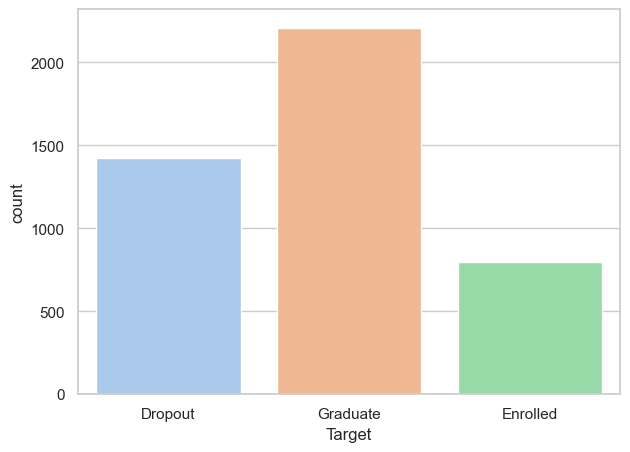

In [426]:
sns.countplot(df, x='Target', palette='pastel')

##### Distribution by Gender

Text(0, 0.5, 'Num of Students')

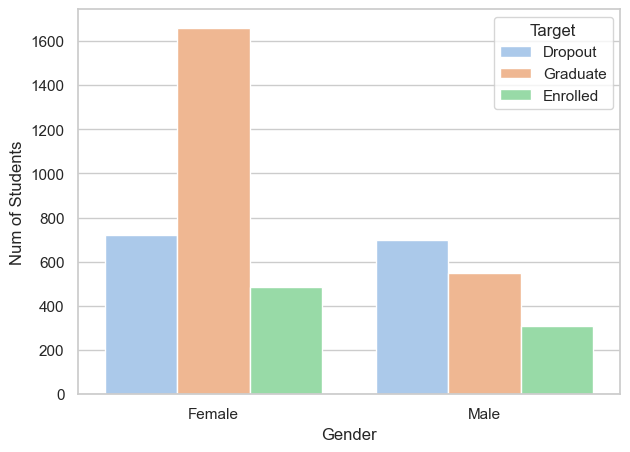

In [427]:
sns.countplot(df, x='Gender', hue='Target', palette='pastel')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('Num of Students')

According to the data there are many more female graduates than male graduates. There appears to be a much larger sample of female students than male students. From this visualization it is easy to see that males are much more likely to drop out than females.

View crosstab of Gender and Target variable:

In [428]:
ct = pd.crosstab(df['Target'], df['Gender'])
ct = ct.rename(columns={0: 'Female', 1: 'Male'})
ct

Gender,Female,Male
Target,,
Dropout,720,701
Enrolled,487,307
Graduate,1661,548


Visualize crosstab.

Text(0, 0.5, 'Num of Students')

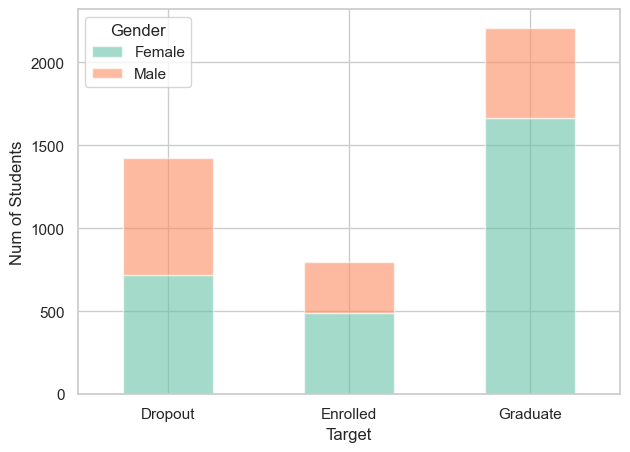

In [429]:
palette = sns.color_palette('Set2')
ct.plot(kind='bar', color=palette, alpha=0.6, stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Num of Students')

This visualization makes it easy to see that males account for approximately half of all dropouts from the sample population.

## Feature Selection

Start by transforming target variable into binary numeric by using get_dummies().

In [430]:
df = pd.get_dummies(df, columns=['Target'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0,0,1
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0,0,1
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0,0,1


Drop the excess dummy variables to retain "Target_Dropout" only and rename back to "Target".

In [431]:
dummies_to_drop = ['Target_Enrolled', 'Target_Graduate']
df.drop(columns=dummies_to_drop, inplace=True)
df.rename(columns={'Target_Dropout': 'Target'}, inplace=True)

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [432]:
#df['Target'].replace({'Graduate': 0, 'Dropout': 1 }, inplace=True)
#df['Target'].head()

Check for collinearity

In [433]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [434]:
df.corr().round(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.00,0.22,-0.13,0.02,-0.27,0.12,-0.02,0.19,0.13,0.07,0.02,-0.23,-0.03,0.03,-0.09,-0.01,-0.05,0.52,-0.03,0.06,0.05,0.06,-0.03,-0.06,0.03,0.06,0.04,0.02,-0.04,-0.07,0.02,-0.02,0.01,-0.03,0.09
Application mode,0.22,1.00,-0.25,-0.09,-0.27,0.43,-0.00,0.09,0.07,0.03,0.00,-0.26,-0.03,0.11,-0.13,0.15,-0.15,0.45,0.01,0.24,0.16,0.22,-0.02,-0.11,0.04,0.23,0.13,0.16,-0.07,-0.10,0.04,0.09,-0.02,-0.01,0.19
Application order,-0.13,-0.25,1.00,0.12,0.16,-0.20,-0.03,-0.06,-0.05,-0.05,-0.03,0.33,0.03,-0.07,0.06,-0.09,0.07,-0.27,-0.03,-0.13,-0.02,-0.09,0.04,0.06,-0.03,-0.13,0.03,-0.06,0.07,0.06,-0.02,-0.10,-0.01,0.03,-0.07
Course,0.02,-0.09,0.12,1.00,-0.07,-0.16,-0.00,0.06,0.05,0.03,0.02,0.01,-0.00,-0.05,0.03,-0.11,0.05,-0.04,-0.00,-0.14,0.11,0.03,0.08,0.18,-0.06,-0.12,0.19,0.05,0.12,0.18,-0.01,-0.05,0.03,-0.01,-0.00
Daytime/evening attendance,-0.27,-0.27,0.16,-0.07,1.00,-0.10,0.02,-0.20,-0.14,-0.04,0.00,0.25,0.03,0.01,0.04,-0.01,0.09,-0.46,0.03,-0.13,-0.04,-0.05,0.02,0.06,0.05,-0.11,0.00,0.01,0.03,0.05,-0.00,0.06,-0.02,0.02,-0.08
Previous qualification,0.12,0.43,-0.20,-0.16,-0.10,1.00,-0.04,0.02,0.01,0.01,0.01,-0.15,-0.02,0.12,-0.10,0.09,-0.09,0.25,-0.03,0.16,0.08,0.13,-0.01,-0.03,0.02,0.14,0.06,0.10,-0.04,-0.04,0.02,0.10,-0.06,0.05,0.09
Nationality,-0.02,-0.00,-0.03,-0.00,0.02,-0.04,1.00,-0.04,-0.09,0.04,0.02,-0.01,-0.00,0.07,-0.04,-0.03,-0.02,-0.01,0.91,0.01,-0.01,0.01,0.00,0.00,0.03,-0.00,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,0.04,-0.00
Mother's qualification,0.19,0.09,-0.06,0.06,-0.20,0.02,-0.04,1.00,0.52,0.30,0.12,-0.08,-0.02,0.02,-0.02,-0.06,0.05,0.28,-0.04,0.04,0.05,0.04,-0.01,-0.03,0.00,0.04,0.03,0.02,-0.01,-0.03,0.02,-0.11,0.06,-0.08,0.06
Father's qualification,0.13,0.07,-0.05,0.05,-0.14,0.01,-0.09,0.52,1.00,0.21,0.18,-0.06,0.00,-0.01,-0.02,-0.07,0.11,0.19,-0.09,0.04,0.04,0.04,0.01,-0.01,-0.02,0.04,0.02,0.01,0.01,-0.01,-0.01,-0.08,0.06,-0.07,0.02
Mother's occupation,0.07,0.03,-0.05,0.03,-0.04,0.01,0.04,0.30,0.21,1.00,0.72,-0.04,-0.01,0.11,-0.00,-0.02,0.09,0.09,0.04,0.00,0.01,0.02,0.02,0.02,-0.01,-0.00,0.01,0.01,0.02,0.04,-0.00,-0.01,0.02,0.09,-0.07


I see some significant collinearity between some of the academic path variables as well as Nationality/International. I will visualize in a heatmap to see more clearly and decide which variables to omit from the analysis. 

First group the features.

In [435]:
# Demographic
demographics = df[["Marital status", "Nationality", "Displaced", "Gender", 
                   "Age at enrollment", "International", "Target"]]
# Academic
academic_path = df[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]

Demographic heatmap.

<Axes: >

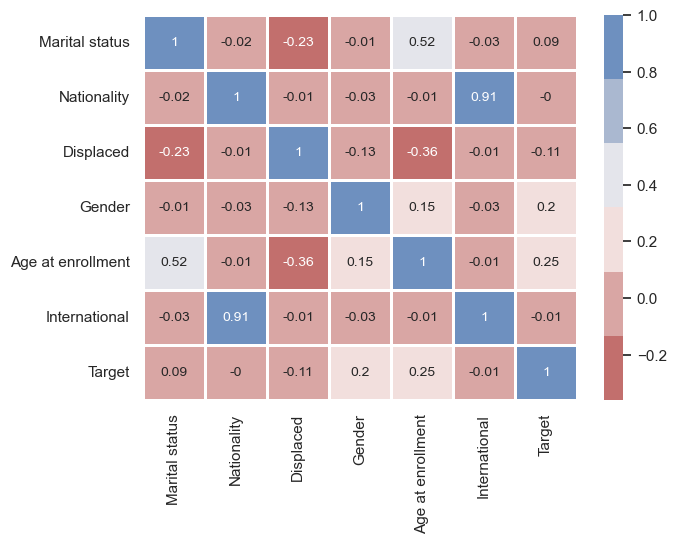

In [436]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.heatmap(demographics.corr().round(2), linewidths=2.0,
            annot=True, annot_kws={"size": 10},
            cmap=sns.color_palette("vlag_r"))

Explore Nationality a little further to see what the sample population looks like.

Text(0.5, 0, 'Num of Students')

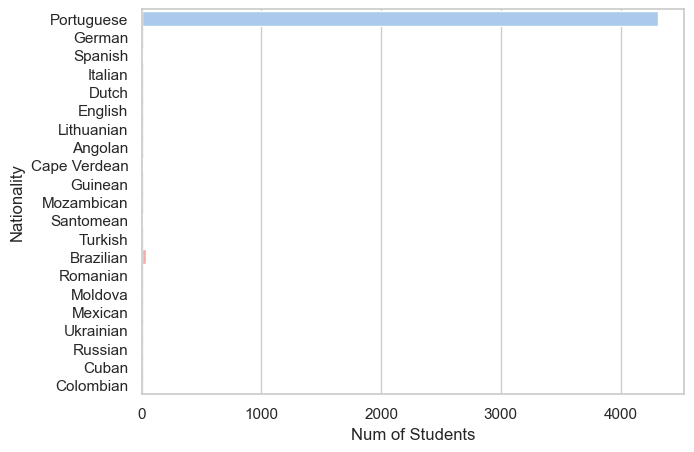

In [437]:
student_nationality = {1:'Portuguese', 2:'German', 3:'Spanish', 4:'Italian', 5:'Dutch', 
               6:'English', 7:'Lithuanian', 8:'Angolan', 9:'Cape Verdean', 
               10:'Guinean', 11:'Mozambican', 12:'Santomean', 13:'Turkish', 
               14:'Brazilian', 15:'Romanian', 16:'Moldova', 17:'Mexican', 
               18:'Ukrainian', 19:'Russian', 20:'Cuban', 21:'Colombian'}
sns.set_style('whitegrid')
plot = sns.countplot(df, y='Nationality', palette='pastel')
plot.set_yticklabels([student_nationality[code] for code in range(1, 22)])
plt.xlabel('Num of Students')


The vast majority of students in this sample population are of Portugese descent, which means that this feature will not be a good predictor of student success and can be dropped from the analysis.

In [438]:
features_to_drop = ['Nationality']

Check each variable's correlation with the target variable.

In [439]:
df.corr()['Target']

Marital status                                    0.093712
Application mode                                  0.188908
Application order                                -0.070485
Course                                           -0.000083
Daytime/evening attendance                       -0.080499
Previous qualification                            0.091590
Nationality                                      -0.001571
Mother's qualification                            0.059499
Father's qualification                            0.016267
Mother's occupation                              -0.069102
Father's occupation                              -0.079753
Displaced                                        -0.107232
Educational special needs                         0.002806
Debtor                                            0.229407
Tuition fees up to date                          -0.429149
Gender                                            0.203983
Scholarship holder                               -0.2453

## Logistic Regression

#### Building The Initial Model

##### Scale the Data

Access the solution algorithm and instantiate as mm_scaler

In [440]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

Fit the scaler to the predictor variables.

In [441]:
X_scaled = mm_scaler.fit_transform(df)

In [442]:
df[df.columns] = X_scaled
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.411765,0.555556,0.0625,1.0,0.0,0.0,0.428571,0.272727,0.161290,0.200000,1.0,0.0,0.0,1.0,1.0,0.0,0.056604,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1.0
1,0.0,0.294118,0.111111,0.6250,1.0,0.0,0.0,0.000000,0.060606,0.096774,0.066667,1.0,0.0,0.0,0.0,1.0,0.0,0.037736,0.0,0.0,0.230769,0.133333,0.230769,0.741722,0.0,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,0.0
2,0.0,0.000000,0.555556,0.2500,1.0,0.0,0.0,0.750000,0.787879,0.290323,0.200000,1.0,0.0,0.0,0.0,1.0,0.0,0.037736,0.0,0.0,0.230769,0.000000,0.000000,0.000000,0.0,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1.0
3,0.0,0.411765,0.222222,0.8750,1.0,0.0,0.0,0.785714,0.787879,0.161290,0.066667,1.0,0.0,0.0,1.0,0.0,0.0,0.056604,0.0,0.0,0.230769,0.177778,0.230769,0.711447,0.0,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,0.0
4,0.2,0.647059,0.111111,0.1250,0.0,0.0,0.0,0.750000,0.818182,0.290323,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.528302,0.0,0.0,0.230769,0.200000,0.192308,0.653422,0.0,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,0.0


##### Create feature and target data structures.

In [443]:
X = df.drop('Target', axis=1)
y = df['Target']

Check the structure of X data structure:

In [444]:
X.shape

(4424, 34)

Verify structure types:

In [445]:
print("X: ", type(X))
print("y: ", type(y))

X:  <class 'pandas.core.frame.DataFrame'>
y:  <class 'pandas.core.series.Series'>


##### Fit Model With One Hold-Out Sample

Split the data into train and testing data using sklearn. Save 30% of the data for testing, and stratify the target variable to keep equal proportions in each group.

In [446]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,
                                                    stratify=df['Target'],
                                                    random_state=1)

Check that the stratify parameter worked by maintaining the same balance in the train/test data sets as the original data frame:

In [447]:
y_train.value_counts()

0.0    2102
1.0     994
Name: Target, dtype: int64

In [448]:
y_test.value_counts()

0.0    901
1.0    427
Name: Target, dtype: int64

In [449]:
print("size of X data structures: ", X_train.shape, X_test.shape)
print("size of y data structures: ", y_train.shape, y_test.shape)

size of X data structures:  (3096, 34) (1328, 34)
size of y data structures:  (3096,) (1328,)


In [450]:
print("Proportion of Target in the training data: ", round(995/(995+1546), 3))
print("Proportion of Target in the testing data: ", round(426/(426+663), 3))

Proportion of Target in the training data:  0.392
Proportion of Target in the testing data:  0.391


The data were split as expected.

##### Access Solution Algorithm

In [451]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs', max_iter=500)

Fit the model to the training data.

In [452]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Show the intercept and coefficients to examine strengths of each feature variable.

In [453]:
print("intercept %.3f" % logistic_model.intercept_, "\n")
cf = pd.DataFrame()
cf['Feature'] = X.columns
cf['Coef'] = np.transpose(logistic_model.coef_).round(3)
cf.sort_values(by='Coef', ascending=False)

intercept 1.451 



/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_20072/3452980507.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("intercept %.3f" % logistic_model.intercept_, "\n")


,Feature,Coef
26,Curricular units 2nd sem (enrolled),3.088
20,Curricular units 1st sem (enrolled),2.078
17,Age at enrollment,1.955
19,Curricular units 1st sem (credited),1.460
25,Curricular units 2nd sem (credited),1.369
3,Course,1.326
13,Debtor,0.677
21,Curricular units 1st sem (evaluations),0.668
2,Application order,0.621
7,Mother's qualification,0.510


##### Evaluate Fit

In [454]:
y_fit = logistic_model.predict(X_train)
y_pred = logistic_model.predict(X_test)

Check the first few predicted values of y to show a string of forecasted positive and negative values.

In [455]:
print(y_pred[0:25])

[0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 0.]


##### Probabilities for Prediction

Check the probilities of the positive outcomes (Dropout) and combine with the predicted values to quickly assess the model's predictions.

In [456]:
probs = [i[1] for i in logistic_model.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
'pred_values': y_pred,
'pred_probs':probs})
pred_df.head(15).transpose().style.format("{:.3}")

,2061,3967,2469,3137,3611,1790,3218,1136,4237,3767,1636,1505,3440,3461,2077
true_values,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
pred_values,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
pred_probs,0.0293,0.782,0.925,0.0563,0.101,0.132,0.215,0.0191,0.0998,0.993,0.267,0.893,0.066,0.306,0.0337


##### Fit Metrics

Check the accuracy of the model with the train and test data.

In [457]:
from sklearn.metrics import accuracy_score
print('Accuracy for training data: %.3f' % accuracy_score(y_train, y_fit))
print('Accuracy for testing data: %.3f' % accuracy_score(y_test, y_pred))

Accuracy for training data: 0.878
Accuracy for testing data: 0.864


The accuracy is highly similar for both the training and testing data, indicating no overfitting.

Next, display the confusion matrix to see how the model performed in terms of false positives and false negatives compared to true positives and true negatives.

In [458]:
from sklearn.metrics import confusion_matrix
c_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
c_matrix

,0,1
0,851,50
1,131,296


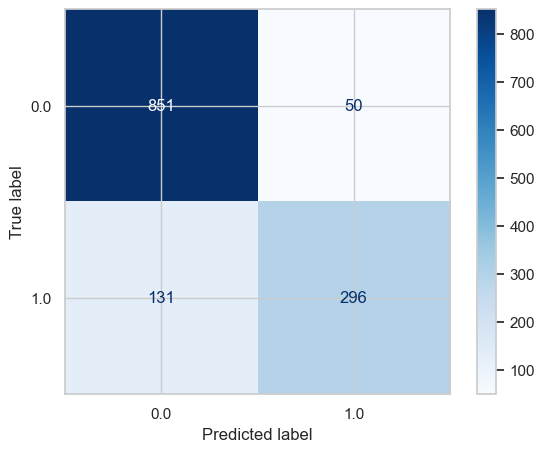

In [459]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [460]:
print("True Negatives: ", c_matrix.iloc[0,0])
print("True Positives: ", c_matrix.iloc[1,1])
print("False Negatives: ", c_matrix.iloc[1,0])
print("False Positives: ", c_matrix.iloc[0,1])

True Negatives:  851
True Positives:  296
False Negatives:  131
False Positives:  50


Calculate Recall, Precision, and F1 scores.

In [461]:
from sklearn.metrics import recall_score, precision_score, f1_score
print ('Recall for testing data: %.3f' % recall_score(y_test, y_pred))
print ('Precision for testing data: %.3f' % precision_score(y_test, y_pred))
print ('F1 for testing data: %.3f' % f1_score(y_test, y_pred))

Recall for testing data: 0.693
Precision for testing data: 0.855
F1 for testing data: 0.766


Based on the lowest fit index (recall) 85.7%, the model correctly forecasts almost 86% of Dropouts as Dropout (true positives). So the model mislabels almost 15% of actual Dropouts as Graduates.  

Precision is even higher, which means that of those the model forecasted as Dropout, 91.7% are actual dropouts.
8% of those predicted as Dropout are indicated as Graduate in the data, a false positive.  

By definition, the F1 statistic is between recall and precision, their harmonic average, at 88.6%.

##### Baseline Probabilities

View the baseline probabilities to help evaluate the effectiveness of the model.

In [462]:
my = y.mean()
max_my = np.max([y.mean(), 1-y.mean()])
print("proportion of 0\'s (Graduate): %.3f" % (1-my))
print("Proportion of 1\'s (Dropout): %.3f" % my)
print("Null model accuracy: %.3f" % max_my)

proportion of 0's (Graduate): 0.679
Proportion of 1's (Dropout): 0.321
Null model accuracy: 0.679


The Logistic regression model with a single hold-out sample is significantly more accurate than the null model.

## Model Validation

Next I will evaluate the effectiveness of the model with multiple hold-out samples using K-fold cross-validation.

In [463]:
from sklearn.model_selection import StratifiedKFold # access solution algorithm and instantiate
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [464]:
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [465]:
from sklearn.model_selection import cross_validate
scores = cross_validate(logistic_model, X, y, cv=skf,
                        scoring=('accuracy', 'recall', 'precision'),
                        return_train_score=True)

Display the scores as a data frame.

In [466]:
logistic_scores = pd.DataFrame(scores).round(3)
logistic_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,0.487,0.009,0.876,0.875,0.712,0.713,0.879,0.873
1,0.621,0.004,0.887,0.874,0.746,0.709,0.883,0.874
2,0.216,0.008,0.872,0.878,0.718,0.717,0.861,0.881
3,0.490,0.013,0.864,0.878,0.676,0.721,0.873,0.878
4,0.509,0.006,0.873,0.878,0.708,0.724,0.874,0.876


Display the mean values for the cross-validation fit metrics.

In [467]:
print('Mean of test accuracy: %.3f' % logistic_scores['test_accuracy'].mean())
print('Mean of test recall: %.3f' % logistic_scores['test_recall'].mean())
print('Mean of test precision: %.3f' % logistic_scores['test_precision'].mean())

Mean of test accuracy: 0.874
Mean of test recall: 0.712
Mean of test precision: 0.874


The result of the cross-validation with multiple hold-out samples is a slight decrease in all three metrics, but overall no significant change in the conclusion of a good-fitting model.

<u>Original fit scores:</u>  
Accuracy for testing data: 0.914  
Recall for testing data: 0.857  
Precision for testing data: 0.917

## Decision Tree

Next, I will test how effective a decision tree model is at predicting the target variable compared to logistic regression. From this information I will be able to determine the best model for predicting student success.

Reestablish X and y data structures and class labels for the final tree.

In [468]:
classes = ['Graduate', 'Dropout']
X = df.drop(['Target'], axis=1)
y = df['Target']

In [469]:
X.head().transpose()

,0,1,2,3,4
Marital status,0.000000,0.000000,0.000000,0.000000,0.200000
Application mode,0.411765,0.294118,0.000000,0.411765,0.647059
Application order,0.555556,0.111111,0.555556,0.222222,0.111111
Course,0.062500,0.625000,0.250000,0.875000,0.125000
Daytime/evening attendance,1.000000,1.000000,1.000000,1.000000,0.000000
Previous qualification,0.000000,0.000000,0.000000,0.000000,0.000000
Nationality,0.000000,0.000000,0.000000,0.000000,0.000000
Mother's qualification,0.428571,0.000000,0.750000,0.785714,0.750000
Father's qualification,0.272727,0.060606,0.787879,0.787879,0.818182
Mother's occupation,0.161290,0.096774,0.290323,0.161290,0.290323


##### Access Solution Algorithm

Accesss the DecisionTreeClassifier and instantiate with a max_depth of 5.

In [470]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model

DecisionTreeClassifier(max_depth=5)

##### Grid Search: Hyperparameter Tuning with Cross-Validation

Access Kfold module with 3 data splits.

In [471]:
from sklearn.model_selection import KFold
kf3 = KFold(n_splits=3, shuffle=True, random_state=1)

Import GridSearchCV and set the parameters.

In [472]:
from sklearn.model_selection import GridSearchCV
kparams = {'max_depth': [2, 3, 4, 5],
           'max_features': [2, 3, 4, 5, 6, 7, 8]}
grid_search = GridSearchCV(dt_model, param_grid=kparams, cv=kf3,
                           scoring=('accuracy', 'recall', 'precision'),
                           refit=False, return_train_score=True)
grid_search.fit(X,y)

/Users/chasecarlson/anaconda3/envs/GSCM575-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chasecarlson/anaconda3/envs/GSCM575-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [2, 3, 4, 5, 6, 7, 8]},
             refit=False, return_train_score=True,
             scoring=('accuracy', 'recall', 'precision'))

In [473]:
dt_results = pd.DataFrame(grid_search.cv_results_).round(3)
dt_results = dt_results.drop(['params'], axis='columns')

In [474]:
pd.set_option('display.max_rows', None)

In [475]:
dt_summary = dt_results[['param_max_depth', 'param_max_features',
'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision', 
'mean_train_accuracy','mean_train_recall', 'mean_train_precision']]
dt_summary = dt_summary.rename(columns= {
'param_max_depth': 'depth',
'param_max_features': 'features',
'mean_test_accuracy': 'test_accuracy',
'mean_test_recall': 'test_recall',
'mean_test_precision': 'test_precision',
'mean_train_accuracy': 'train_accuracy',
'mean_train_recall': 'train_recall',
'mean_train_precision': 'train_precision'})
dt_summary

,depth,features,test_accuracy,test_recall,test_precision,train_accuracy,train_recall,train_precision
0,2,2,0.738,0.405,0.433,0.740,0.419,0.436
1,2,3,0.770,0.381,0.808,0.774,0.383,0.814
2,2,4,0.813,0.723,0.703,0.820,0.728,0.717
3,2,5,0.789,0.509,0.759,0.791,0.521,0.762
4,2,6,0.811,0.692,0.728,0.817,0.685,0.741
5,2,7,0.816,0.690,0.725,0.821,0.696,0.733
6,2,8,0.777,0.461,0.749,0.778,0.458,0.758
7,3,2,0.808,0.589,0.776,0.802,0.582,0.771
8,3,3,0.824,0.679,0.751,0.824,0.688,0.745
9,3,4,0.823,0.614,0.805,0.820,0.610,0.802


In [476]:
dt_summary['accuracy_variance'] = abs(dt_summary['train_accuracy'] - dt_summary['test_accuracy'])
dt_summary['recall_variance'] = abs(dt_summary['train_recall'] - dt_summary['test_recall'])
dt_summary['precision_variance'] = abs(dt_summary['train_precision'] - dt_summary['test_precision'])
dt_summary

,depth,features,test_accuracy,test_recall,test_precision,train_accuracy,train_recall,train_precision,accuracy_variance,recall_variance,precision_variance
0,2,2,0.738,0.405,0.433,0.740,0.419,0.436,0.002,0.014,0.003
1,2,3,0.770,0.381,0.808,0.774,0.383,0.814,0.004,0.002,0.006
2,2,4,0.813,0.723,0.703,0.820,0.728,0.717,0.007,0.005,0.014
3,2,5,0.789,0.509,0.759,0.791,0.521,0.762,0.002,0.012,0.003
4,2,6,0.811,0.692,0.728,0.817,0.685,0.741,0.006,0.007,0.013
5,2,7,0.816,0.690,0.725,0.821,0.696,0.733,0.005,0.006,0.008
6,2,8,0.777,0.461,0.749,0.778,0.458,0.758,0.001,0.003,0.009
7,3,2,0.808,0.589,0.776,0.802,0.582,0.771,0.006,0.007,0.005
8,3,3,0.824,0.679,0.751,0.824,0.688,0.745,0.000,0.009,0.006
9,3,4,0.823,0.614,0.805,0.820,0.610,0.802,0.003,0.004,0.003


Based on the grid search above, a decision tree model with a depth of 4 and 6 features seems to fit the data reasonably well, with the highest recall and minimal variance between the train/test data. I will use this model to test on the data.

In [477]:
dt_model = DecisionTreeClassifier(max_depth=4, max_features=6)
dt_fit = dt_model.fit(X,y) # Save the results of the .fit() for use in the Tree later.

##### Check Feature Importance

In [478]:
dImp = pd.DataFrame(dt_model.feature_importances_)
dImp = dImp.set_index(X.columns, drop=False)
dImp.columns = ['Importance']
dImp.round(3)

,Importance
Marital status,0.000
Application mode,0.000
Application order,0.000
Course,0.001
Daytime/evening attendance,0.000
Previous qualification,0.000
Nationality,0.000
Mother's qualification,0.003
Father's qualification,0.000
Mother's occupation,0.000


Age at enrollment and Curricular units 1st sem(approved) hold the most weight in the model. 

Compute predicted values with the final model.

In [479]:
y_fit = dt_model.predict(X)
y_fit[0:19]

array([0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0.])

View confusion matrix.

In [480]:
pd.DataFrame(confusion_matrix(y, y_fit))

,0,1
0,2650,353
1,323,1098


##### Visualize The Tree

In [481]:
from sklearn import tree

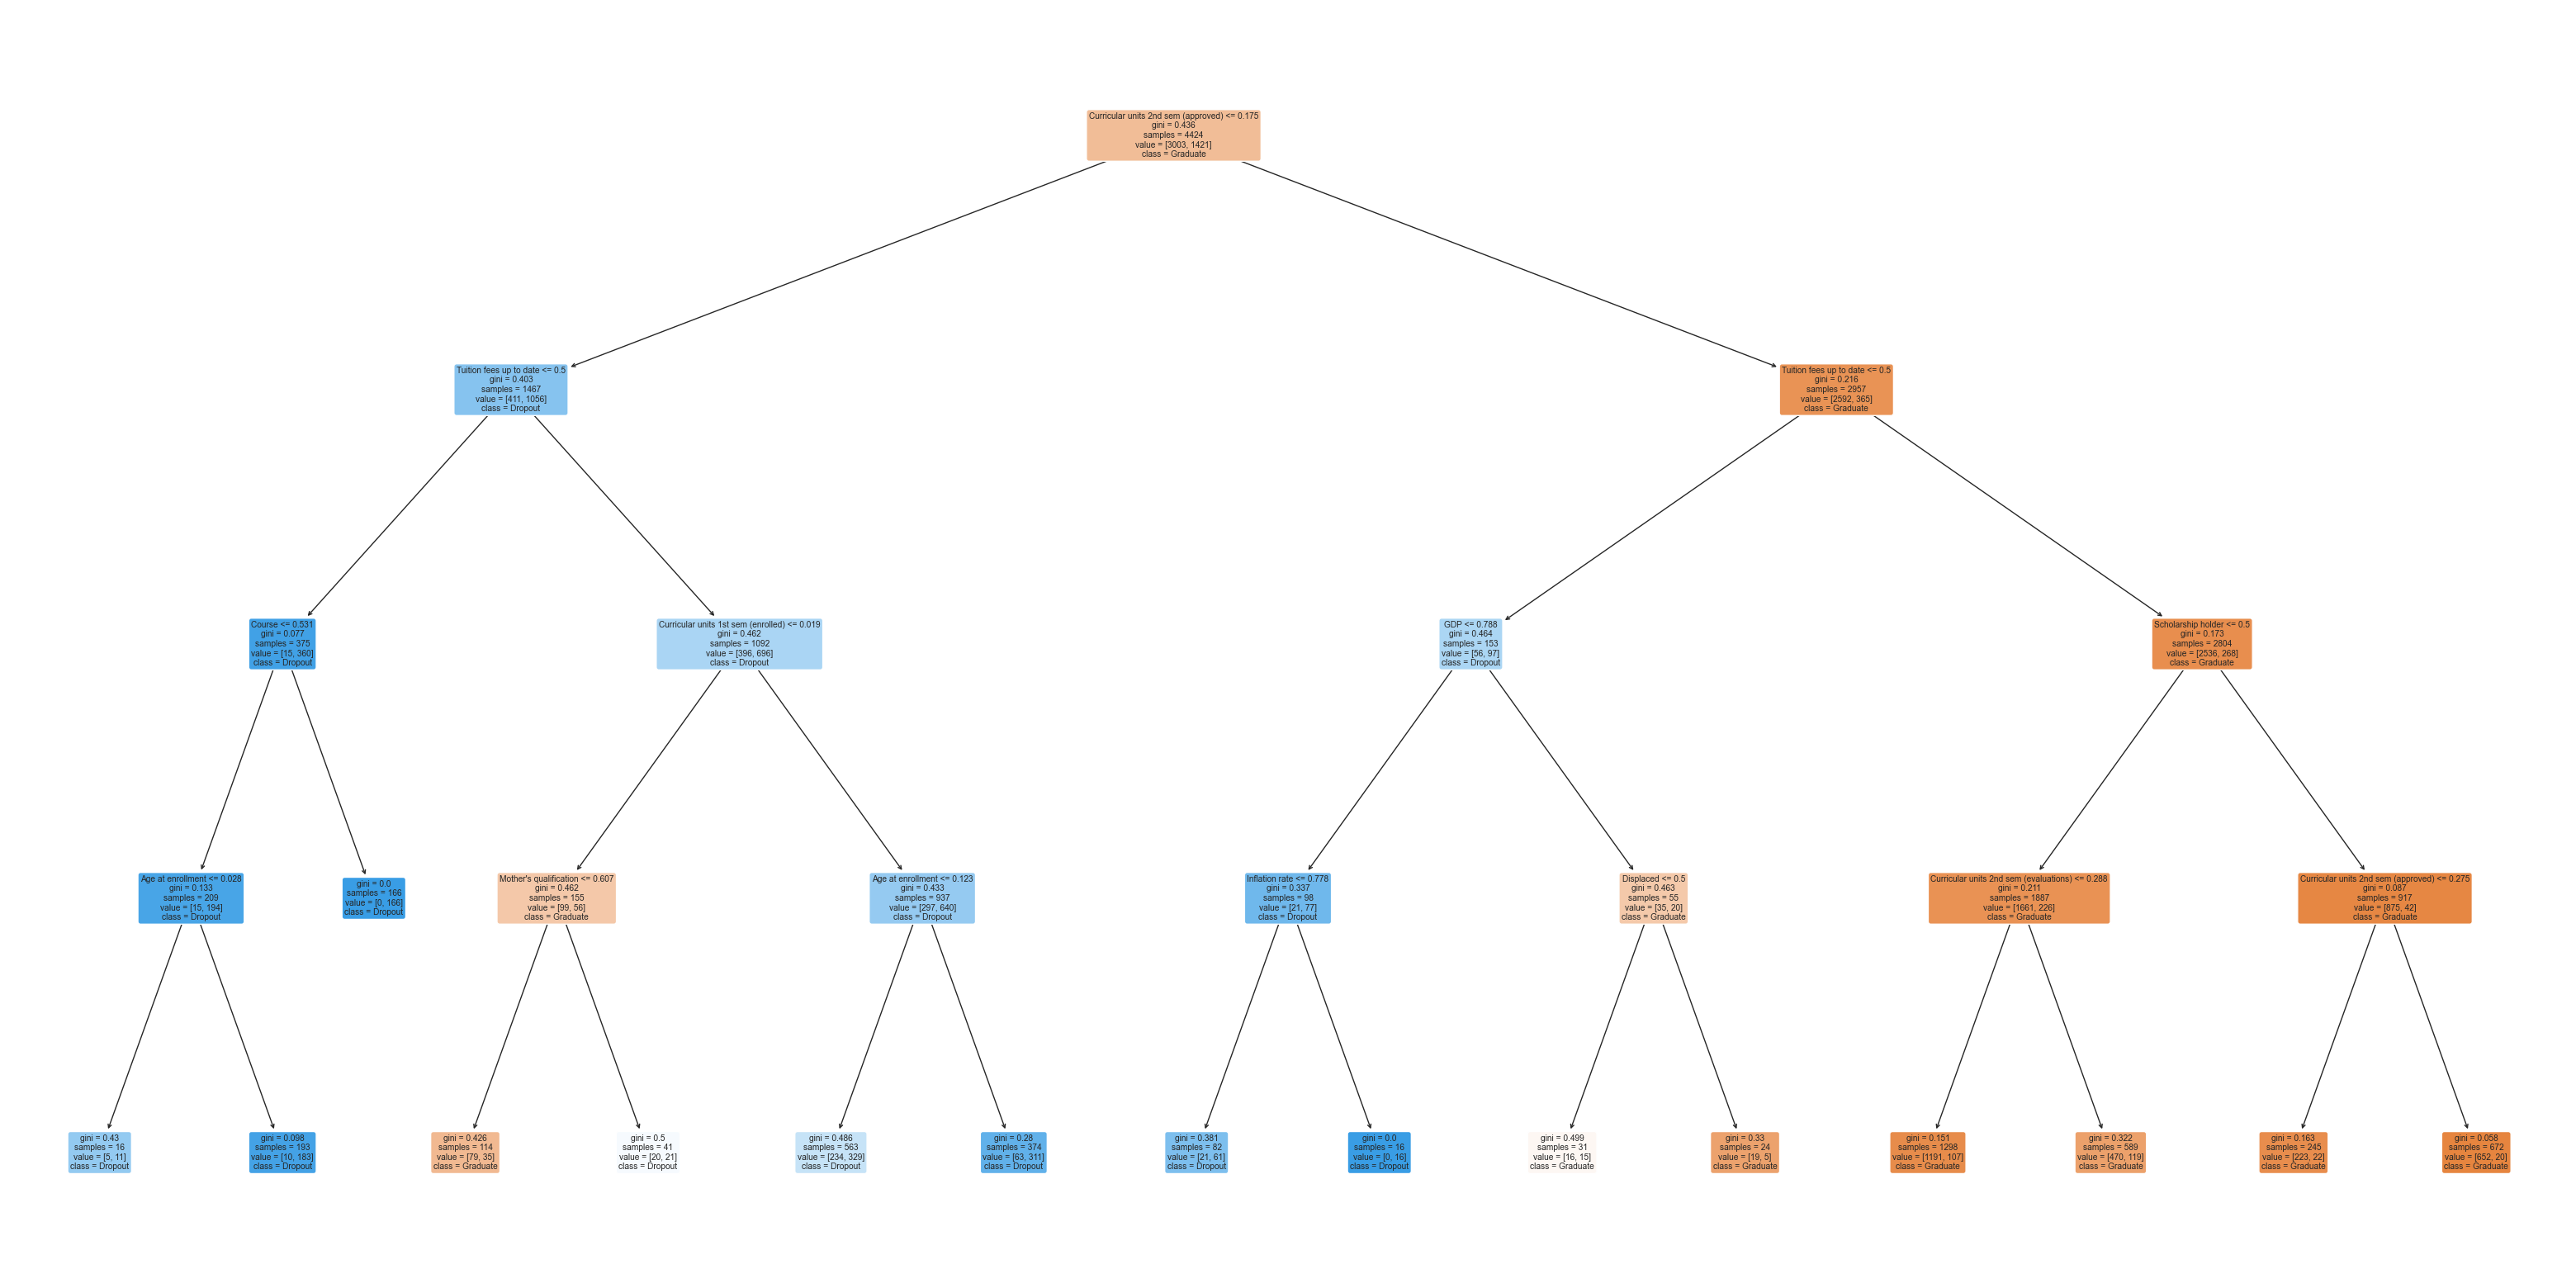

In [482]:
plt.figure(figsize=(40,20))
tree.plot_tree(dt_fit, feature_names = X.columns.tolist(), 
               class_names=['Graduate', 'Dropout'], 
               rounded=True, filled=True)
plt.savefig('dt_Dropout.png')

Visualize as text to make it easier to read.

In [483]:
# access export_text module from sklearn
from sklearn.tree import export_text

In [484]:
text = export_text(dt_fit, feature_names=X.columns.tolist())
print(text)

|--- Curricular units 2nd sem (approved) <= 0.18
|   |--- Tuition fees up to date <= 0.50
|   |   |--- Course <= 0.53
|   |   |   |--- Age at enrollment <= 0.03
|   |   |   |   |--- class: 1.0
|   |   |   |--- Age at enrollment >  0.03
|   |   |   |   |--- class: 1.0
|   |   |--- Course >  0.53
|   |   |   |--- class: 1.0
|   |--- Tuition fees up to date >  0.50
|   |   |--- Curricular units 1st sem (enrolled) <= 0.02
|   |   |   |--- Mother's qualification <= 0.61
|   |   |   |   |--- class: 0.0
|   |   |   |--- Mother's qualification >  0.61
|   |   |   |   |--- class: 1.0
|   |   |--- Curricular units 1st sem (enrolled) >  0.02
|   |   |   |--- Age at enrollment <= 0.12
|   |   |   |   |--- class: 1.0
|   |   |   |--- Age at enrollment >  0.12
|   |   |   |   |--- class: 1.0
|--- Curricular units 2nd sem (approved) >  0.18
|   |--- Tuition fees up to date <= 0.50
|   |   |--- GDP <= 0.79
|   |   |   |--- Inflation rate <= 0.78
|   |   |   |   |--- class: 1.0
|   |   |   |--- Inflati

Decision Tree Accuracy: 0.886  
Decision Tree Recall: 0.781  
Decision Tree Precision:  0.917

Logistic Accuracy: 0.906  
Logistic Recall: 0.834  
Logistic Precision: 0.918  

With all of the fit indicies (accuracy, recall, & precision) lower than the logistic regression model, this analysis indicates that the logistic regression model is the optimal model to predict student success.

## Random Forest Analysis

In [485]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=5)
rf_model

RandomForestClassifier(max_depth=5)